<a href="https://colab.research.google.com/github/ktanguy/BUMI/blob/main/Tanguy_Kwizera_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [5]:
#LOAD THE DATA.
df = pd.read_csv('water_potability.csv')
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


Plot the Data Appropriately

In [6]:

# -- Your synthetic dataset for training
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# Each Memeber Defines their model Here

In [9]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Start the training Process

In [11]:
# Split: 70% train, 15% val, 15% test
X_temp, testX, y_temp, testy = train_test_split(X_scaled, y, test_size=0.15, random_state=1)
trainX, valX, trainy, valy = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=1)

In [12]:
print(trainX.shape, valX.shape, testX.shape)

(69, 2) (16, 2) (15, 2)


In [13]:
# Model Definition by Tanguy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

def model_tanguy():
    model = Sequential()
    model.add(Input(shape=(2,)))
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = SGD(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [28]:
# Create and train model
model = model_tanguy()
print(model.summary())

es = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
history = model.fit(trainX, trainy, validation_data=(valX, valy), epochs=4000, verbose=1, callbacks=[es])


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.3949 - loss: 0.8101 - val_accuracy: 0.1250 - val_loss: 0.7973
Epoch 2/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3503 - loss: 0.7601 - val_accuracy: 0.1250 - val_loss: 0.7869
Epoch 3/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4551 - loss: 0.7647 - val_accuracy: 0.1250 - val_loss: 0.7768
Epoch 4/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3753 - loss: 0.7861 - val_accuracy: 0.1250 - val_loss: 0.7656
Epoch 5/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4852 - loss: 0.7697 - val_accuracy: 0.3125 - val_loss: 0.7550
Epoch 6/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4702 - loss: 0.7631 - val_accuracy: 0.3750 - val_loss: 0.7475
Epoch 7/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4763 - loss: 0.7363 - val_accuracy: 0.4375 - val_loss: 0.7423
Epoch 8/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5906 - loss: 0.6869 - val_accuracy: 0.50

In [15]:
# Evaluate
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Train Accuracy: 0.870, Test Accuracy: 0.933


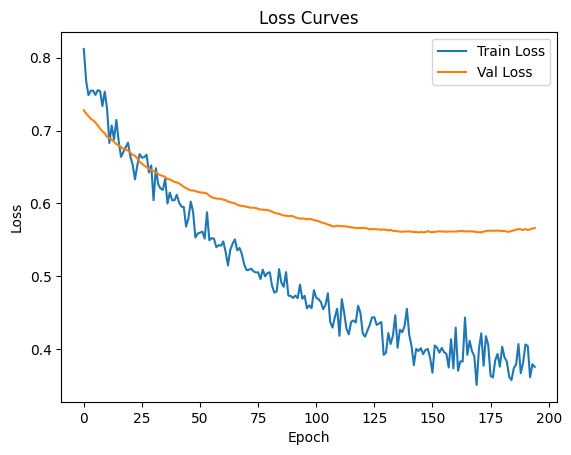

In [16]:
# Plot loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [29]:
# Predictions
y_probs = model.predict(testX)
y_pred = (y_probs > 0.5).astype("int32")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [30]:
# Classification Metrics
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(testy, y_pred)
f1 = f1_score(testy, y_pred)
recall = recall_score(testy, y_pred)
precision = precision_score(testy, y_pred)

print(f"\nAccuracy: {accuracy:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")


Accuracy: 0.933
F1 Score: 0.909
Recall: 0.833
Precision: 1.000


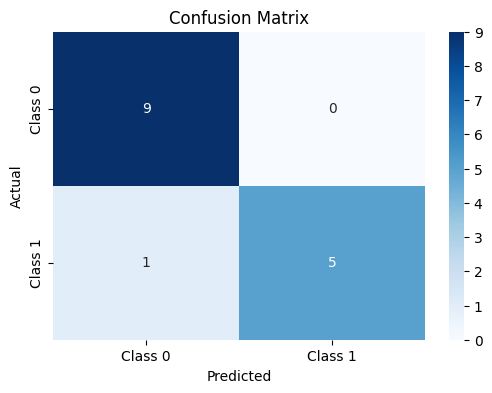

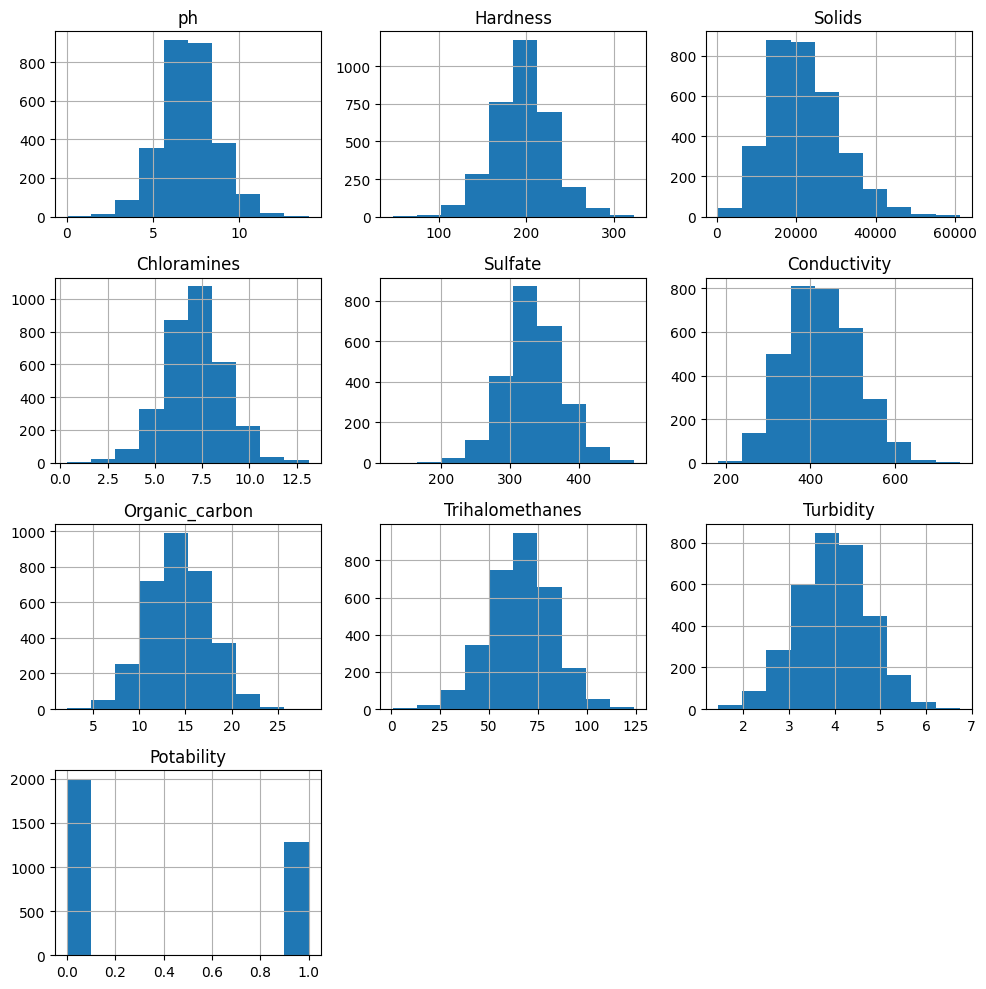

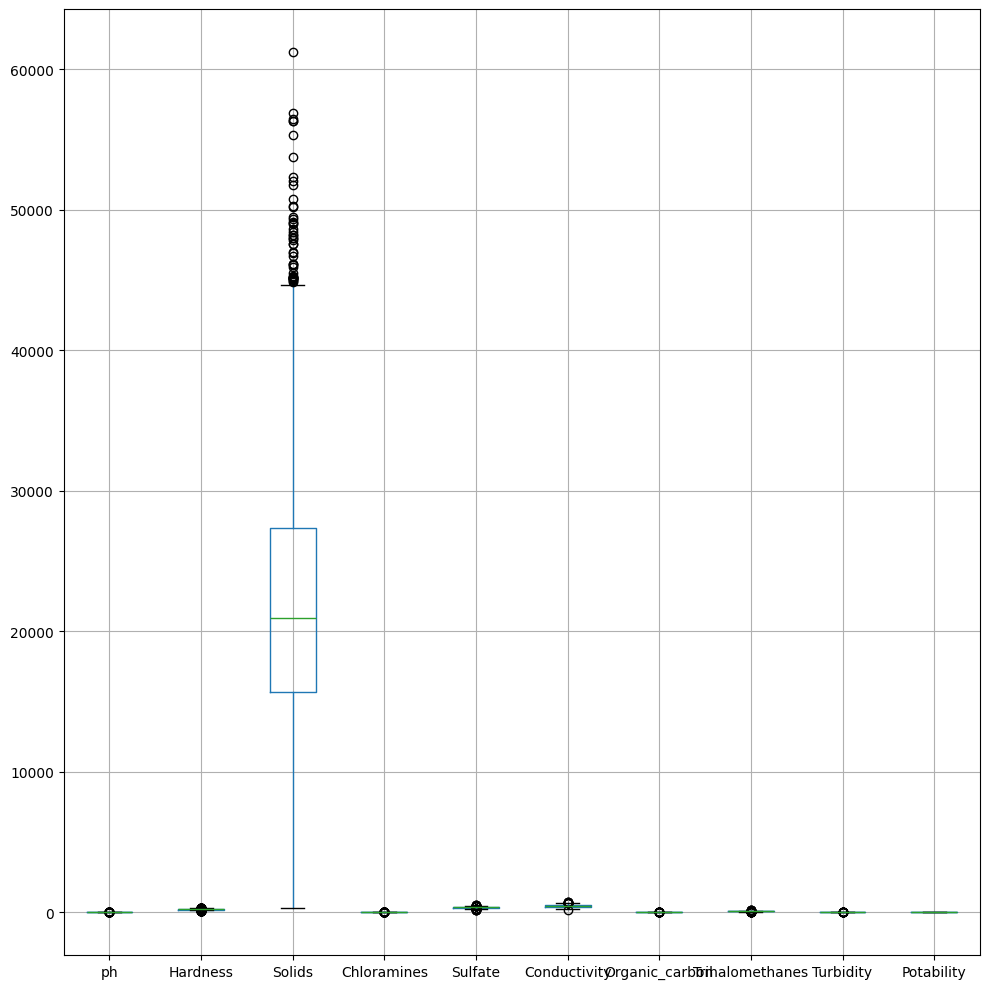

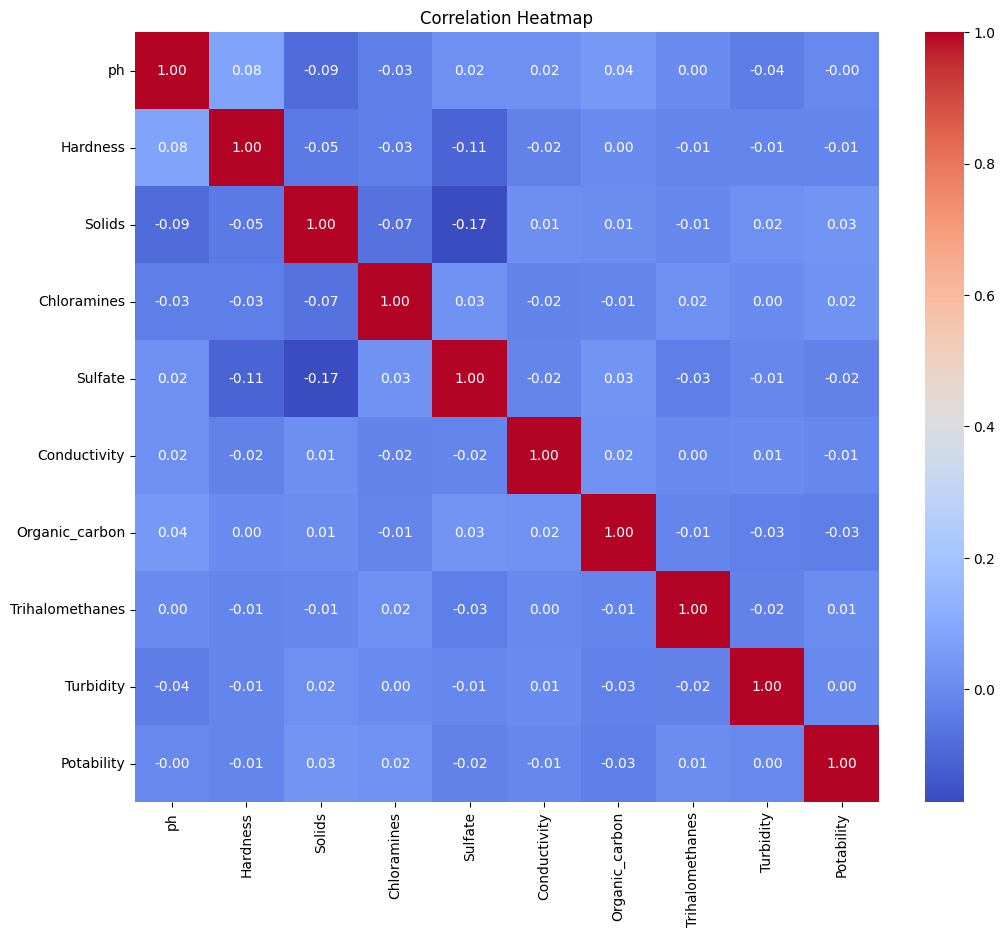

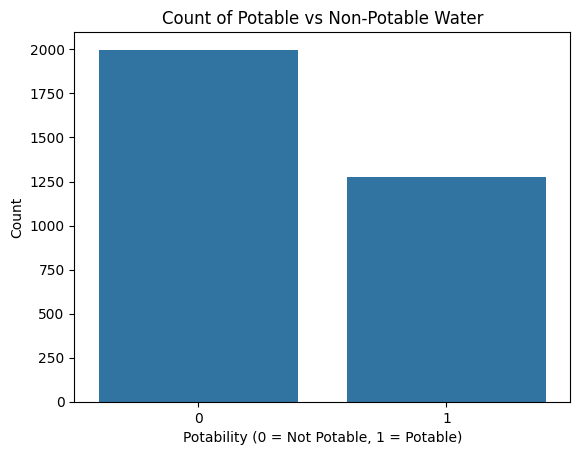

In [31]:
# Confusion Matrix
import seaborn as sns

cm = confusion_matrix(testy, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

df.boxplot(figsize=(10, 10))
plt.tight_layout()
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

sns.countplot(x='Potability', data=df)
plt.title("Count of Potable vs Non-Potable Water")
plt.xlabel("Potability (0 = Not Potable, 1 = Potable)")
plt.ylabel("Count")
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.83      0.91         6

    accuracy                           0.93        15
   macro avg       0.95      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15



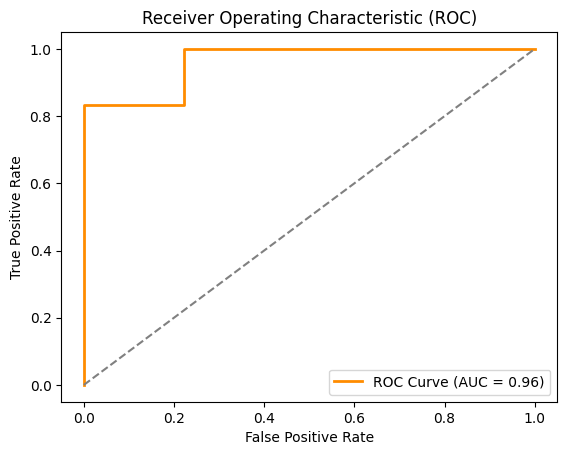

6362/6362 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


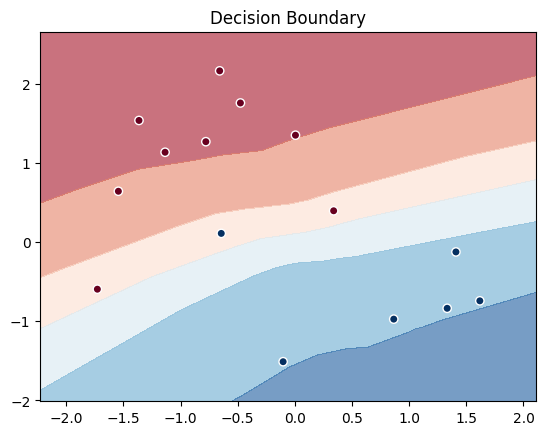

In [20]:
# Classification Report
print("\nClassification Report:")
print(classification_report(testy, y_pred))

# ROC Curve and AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(testy, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Decision Boundary Plot (optional but useful for 2D input)
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, probs, cmap="RdBu", alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", edgecolor="white")
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(model, testX, testy)